In [2]:
%load_ext watermark
%watermark  -d -u -a 'Andreas Mueller, Kyle Kastner, Sebastian Raschka' -v -p numpy,scipy,matplotlib

Author: Andreas Mueller, Kyle Kastner, Sebastian Raschka

Last updated: 2022-08-14

Python implementation: CPython
Python version       : 3.9.5
IPython version      : 7.23.1

numpy     : 1.22.3
scipy     : 1.6.3
matplotlib: 3.4.2



The use of watermark (above) is optional, and we use it to keep track of the changes while developing the tutorial material. (You can install this IPython extension via "pip install watermark". For more information, please see: https://github.com/rasbt/watermark).

# 1 机器学习基础

## 什么是机器学习(Machine Leearning)?

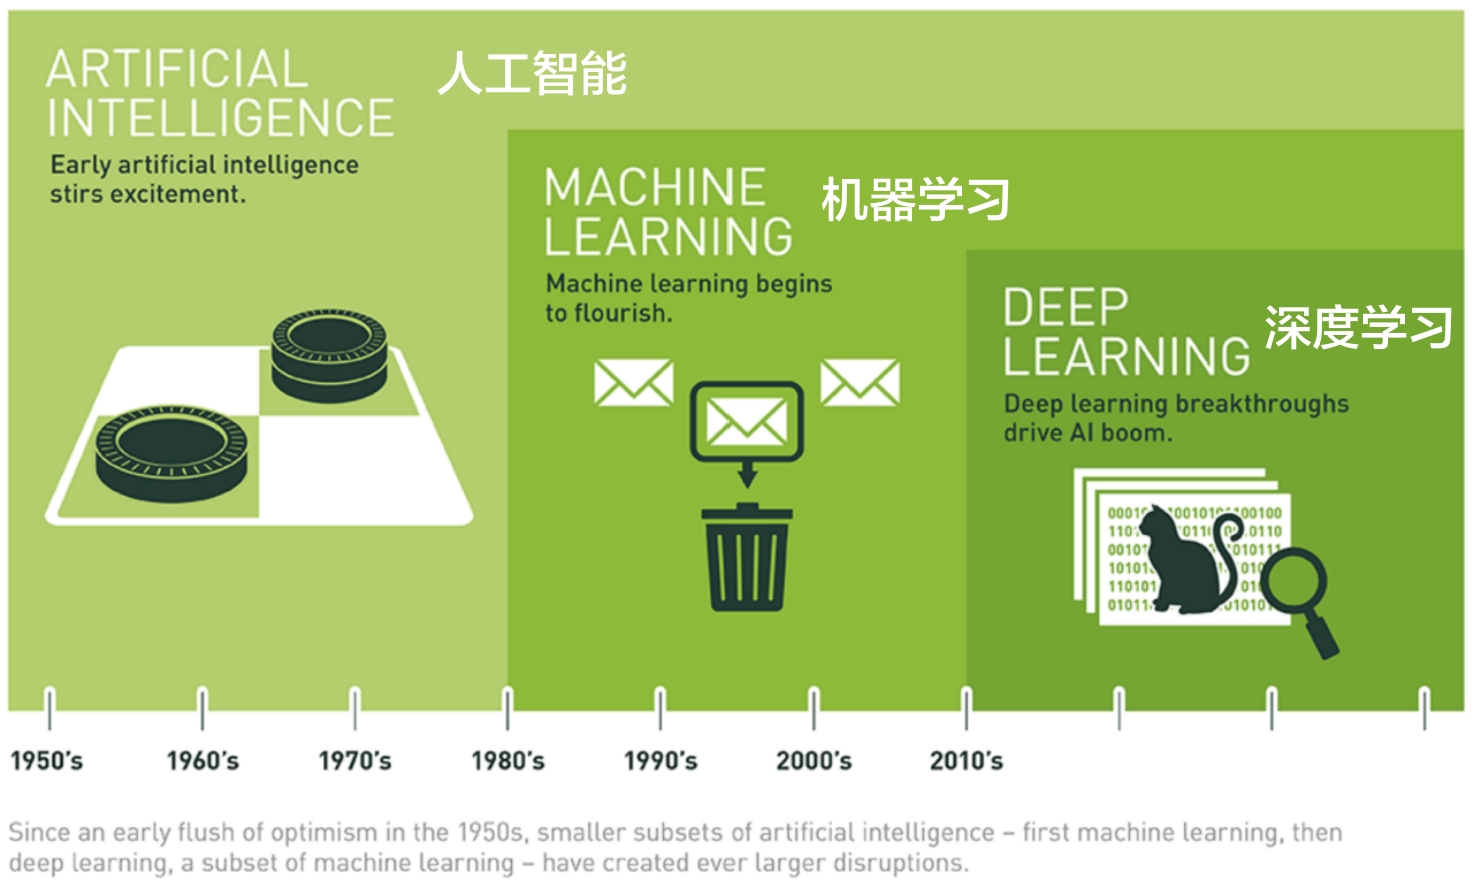

机器学习是**从数据中自动提取知识**的过程，通常是通过对已经掌握的的数据进行分析和建模，对新的、没见过的数据做出预测。一个典型的例子是垃圾邮件过滤器，用户不断地将收到的邮件标记为垃圾邮件或非垃圾邮件(已知数据)。然后，机器学习算法从已经标记的邮件数据中“学习”预测模型，该模型可以预测新邮件(未知数据)是否是垃圾邮件。   

机器学习的内涵：利用计算机的强大计算能力，从数据中发现一个**“函数”或“模型”**，通过它来模拟现实世界事物间的关系，进而对新数据作出预测或判断。（参考《零基础学机器学习》）    

机器学习编程新范式：有别于传统编程，**无需用户指定明确的决策规则**从数据中**学习**以自动作出决策(decision making)。

传统方法 (图参考《机器学习实战(第二版)》)：
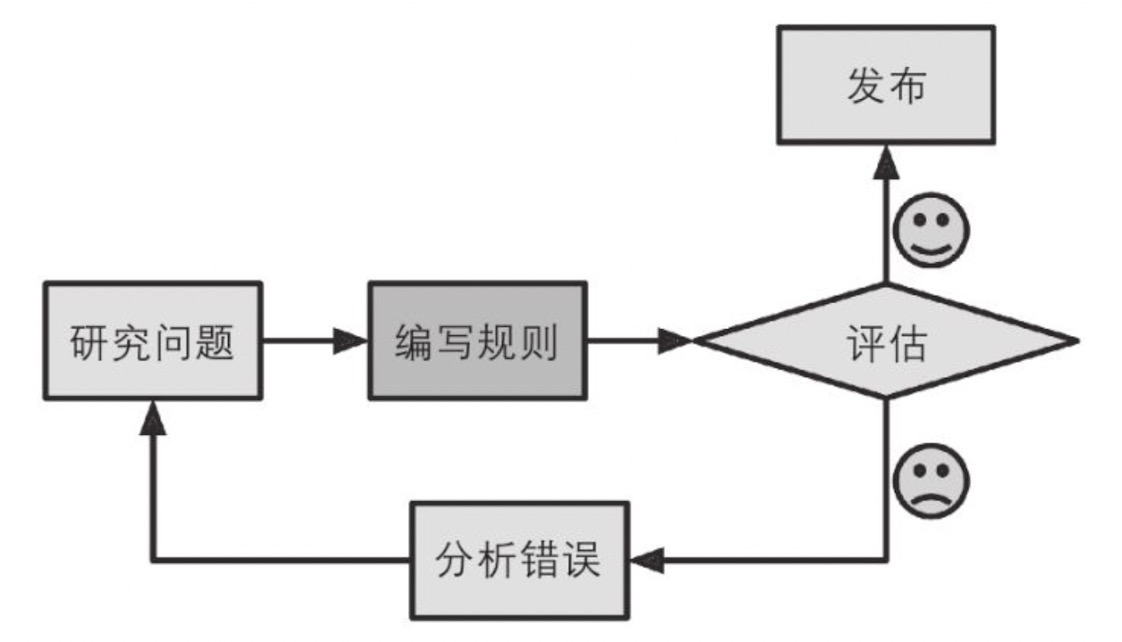

机器学习方法：
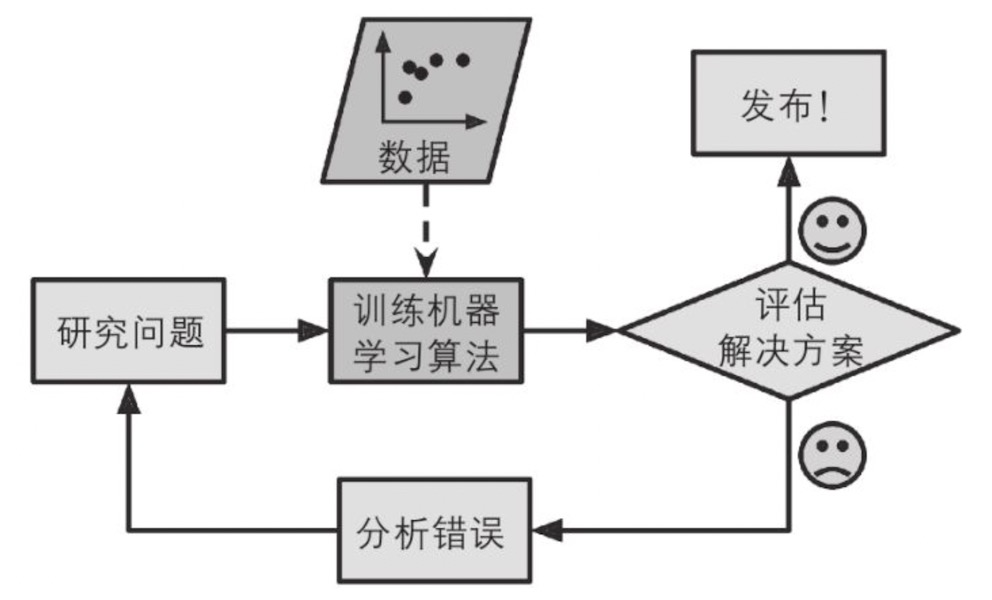

在线自动更新的机器学习方法：
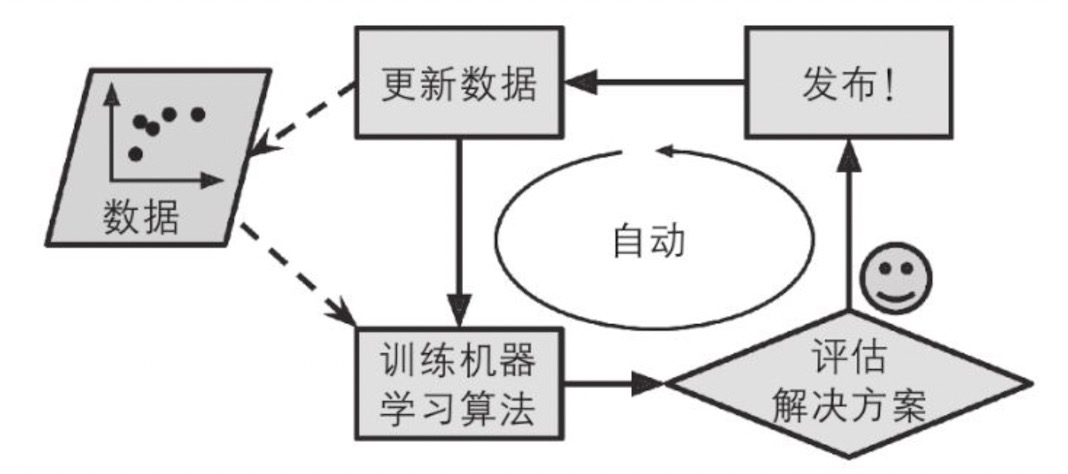

比如电子邮件分类，用户不会告诉你垃圾邮件可能会包含什么词、有哪些特点，只能告诉你哪些是垃圾邮件、哪些不是垃圾邮件（示例样本）。  

另一个核心概念：**泛化**(generalization)，实际上就是对新的、没见过的数据，根据已知数据中得到的知识，作出预测。例如，已经打上垃圾邮件标签的电子邮件不重要，能判断新收到的邮件是不是垃圾邮件才重要。

机器学习与人类学习：
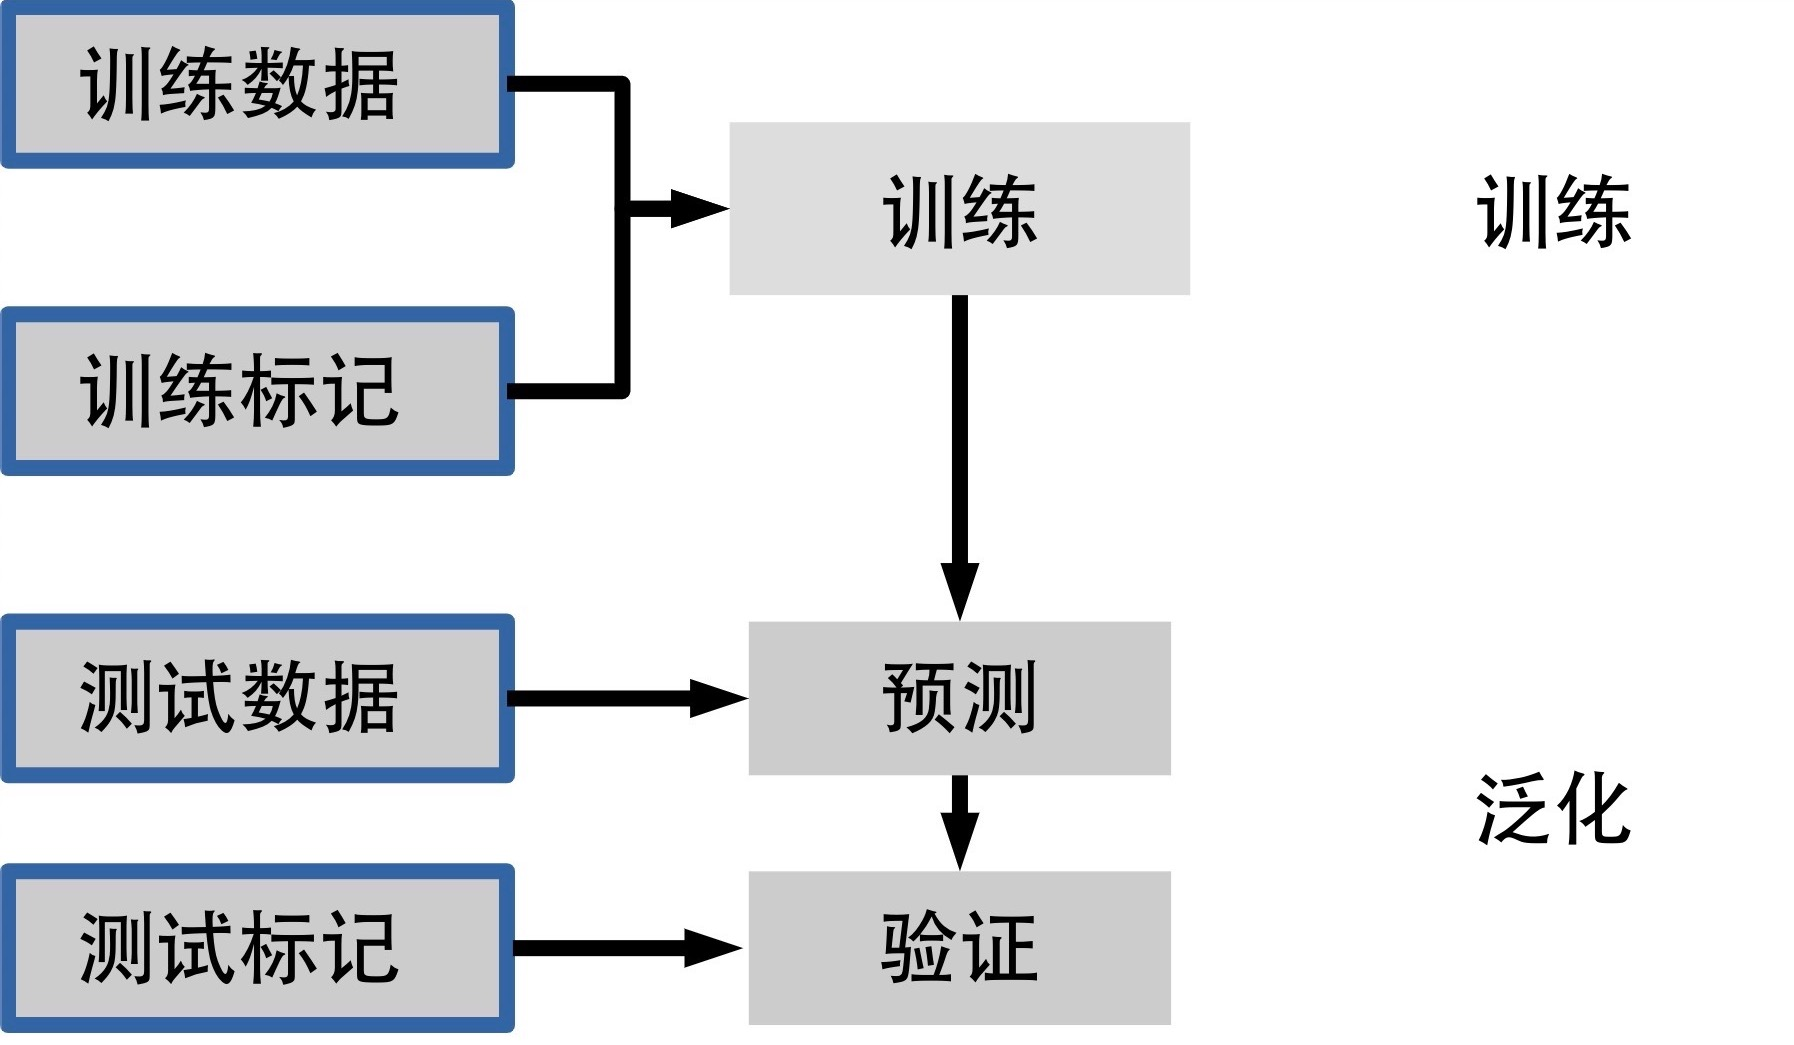

数据通常以二维数组(或矩阵)的形式提供。要学习或做出决策的每个数据点(也称为*样本(sample)*或*训练实例(training instance)*)都表示为一个数值列表，即所谓的特征向量(feature vector)，其中包含的特征表示该点的属性。
 
稍后，我们将用一个流行的数据集，叫做*鸢尾花(Iris)* ——也是众多数据集之一。鸢尾花是机器学习领域的经典基准(benchmark)数据集，包含来自3个不同品种的150朵鸢尾花的测量值：山鸢尾花(Iris-Setosa)、变色鸢尾花(Iris-Versicolor)和维吉尼亚鸢尾花(Iris-Virginica)。


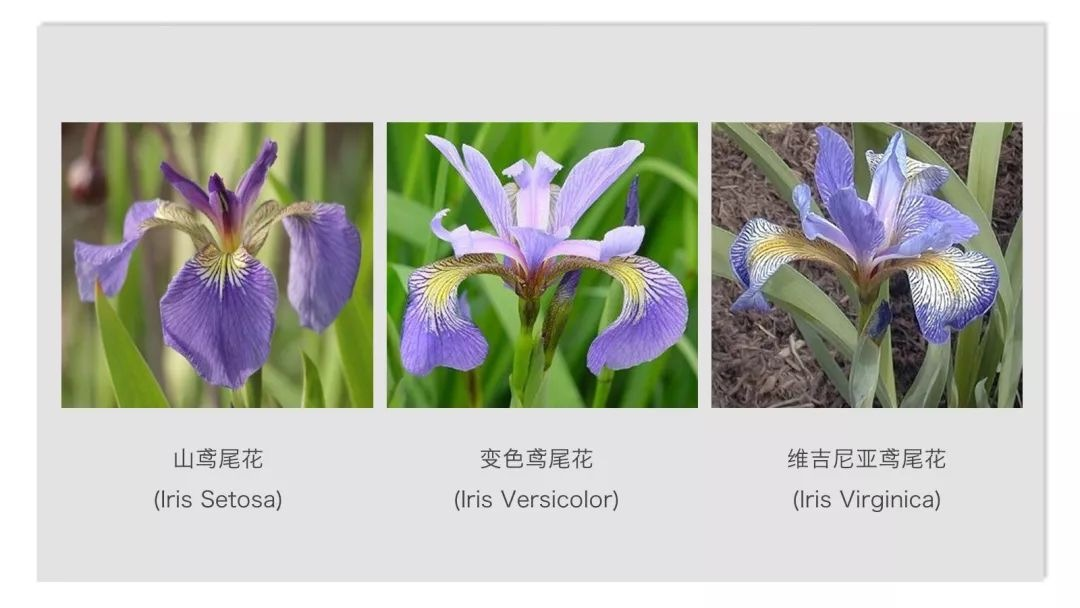


将每个花朵样本表示为数组(array)中的一行，而列(特征)则以厘米为单位表示花朵的尺寸。例如，我们可以用以下格式表示这个鸢尾花数据集，由150个样本和4个特征构成一个二维阵列或矩阵$\mathbb{R}^{150 \times 4}$，如下:


$$\mathbf{X} = \begin{bmatrix}
    x_{1}^{(1)} & x_{2}^{(1)} & x_{3}^{(1)} & \dots  & x_{4}^{(1)} \\
    x_{1}^{(2)} & x_{2}^{(2)} & x_{3}^{(2)} & \dots  & x_{4}^{(2)} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{1}^{(150)} & x_{2}^{(150)} & x_{3}^{(150)} & \dots  & x_{4}^{(150)}
\end{bmatrix}.
$$

(上标i表示第*i*行，下标j表示第*j*个特征)

我们将讨论机器学习的两种类型：***监督学习***(supervised learning)和***无监督学习***(unsupervised learning)。

### 监督学习(Supervised Learning): 分类(Classification)和回归(regression)

在**监督学习**中，我们有一个由输入特征和目标输出组成的数据集，例如在垃圾/非垃圾邮件的例子里。任务是构建一个模型(或程序)，给定一组特征，能预测出没见过的目标期望的输出。
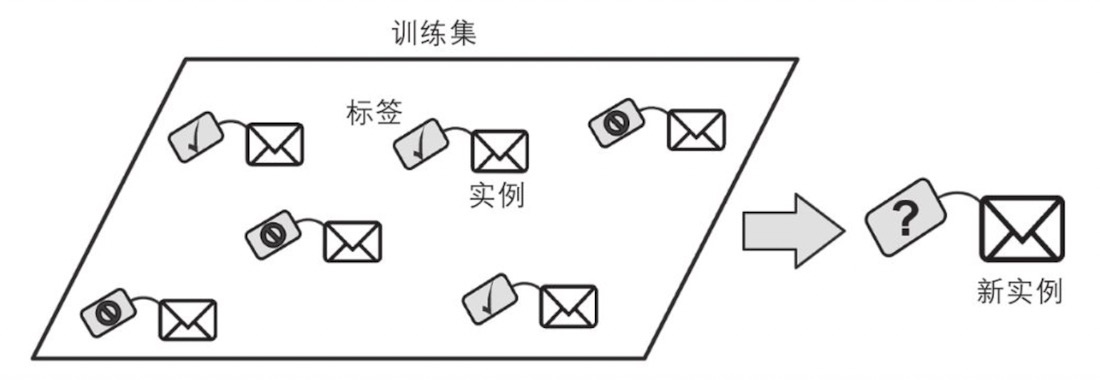

更复杂的例子包括:

- 给定望远镜观测到的目标的多色图像，确定(recognize)它是恒星、类星体还是星系。
- 给定一个人的照片，识别(identify)照片中的人。
- 给出一个人看过的电影列表和他们的个人评价，给他们推荐(recommend)可能会喜欢的电影列表。
- 给定一个人的年龄、教育程度和职位，推断(infer)他们的工资。

##### 注：我们常常用“预测”来描述模型的推断出期望结果的过程，这里指的未必是将来的事，也可能是现在甚至是过去，只要是推断见所未见之事，广义上都可以叫“预测”。

这些任务又一个共同特点：有一个或多个与目标关联的未知量，需要根据其他已经观察到的量才能得到。

进一步，监督学习可细分为两类：**分类(classification)**和**回归(regression)**:

- **标签是离散的，叫做分类**，如“垃圾邮件”和“非垃圾邮件”。换句话说，它提供了类别之间的明确区分。此外，还需要注意，类标签是标称(Nominal)的，而不是顺序(ordinal)变量。标称变量和顺序变量都是分类变量的子类。顺序变量意味着是有序的，例如，T恤尺寸“XL > L > M > S”。而标称变量不表示有序，例如，我们(通常)不能假设“橙色>蓝色>绿色”。


- **标签是连续的，叫做回归**，可能是个浮点输出。例如，在天文学中，确定一个目标是恒星、星系还是类星体的任务是分类问题：标签来自三个不同的类别。另一方面，我们可能希望基于这样的观察来估计目标的年龄：这就是个回归问题，因为标签(年龄)是连续量。
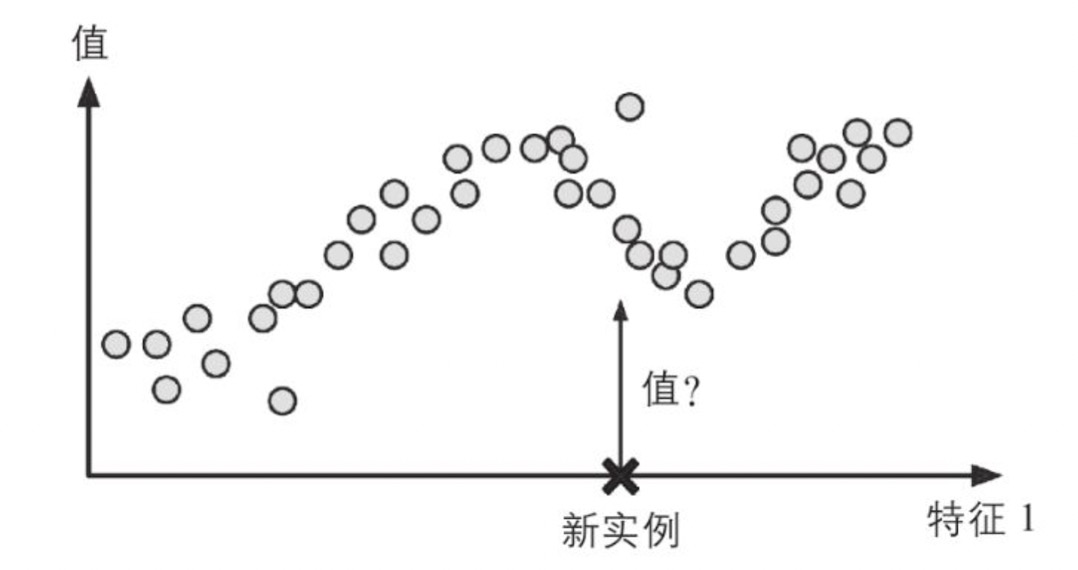

在监督学习中，给出期望结果的**训练集**(training set)和需要推断期望结果的**测试集**(test set)总是不同的。学习(拟合)训练集得到预测模型，通过测试集评价泛化性能。


### 无监督学习(Unsupervised Learning)

在**无监督学习**中，没有与数据相关的期望输出，我们感兴趣的是从给定数据中提取某种形式的知识或模型。可以把无监督学习视为从数据本身发现标签的一种手段。无监督学习通常更难理解和评价。

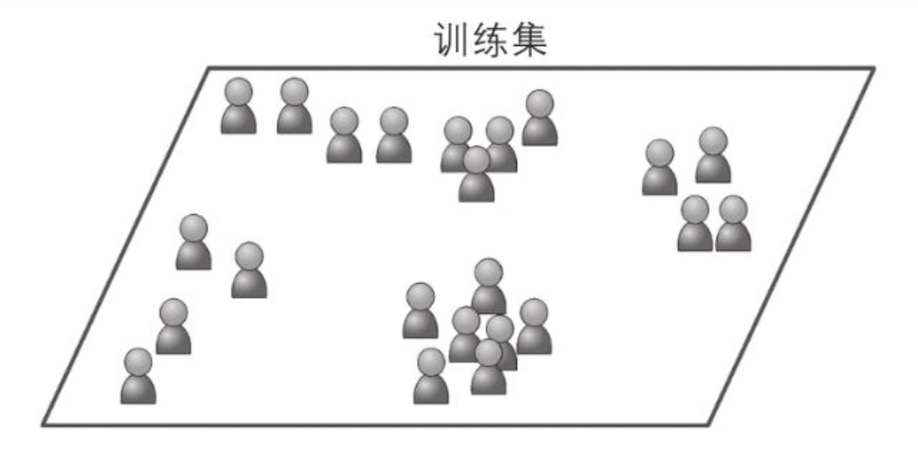

无监督学习包括像**降维**(dimensionality reduction) ，**聚类**(clustering) ，和**密度估计**(density estimation)等这样一些任务。例如上面讨论的虹膜数据，可以用无监督方法，确定哪些测量组合，能最有效地显示数据的结构。正如我们在下面将会看到的，这样的数据投影可以用来将四维数据可视化为二维图像。一些更复杂的无监督学习问题包括:

- 给出对遥远星系的详细观测，确定哪些特征或特征组合能最好地总结信息。
- 假设有两个音源的混合(例如，一个人音乐背景下讲话),将两者分开(这就是所谓的[盲源分离\(blind source separation\)]( http://en.wikipedia.org/wiki/blind_signal_separation )问题)。
- 给定一个视频，分离出其中的运动目标，并根据已经看到的其他运动目标进行分类。
- 收集大量新闻文章，在其中找到重复出现的主题。
- 给定一个图像集合，将相似的图像聚合在一起(例如在可视化一个集合时将它们分组)

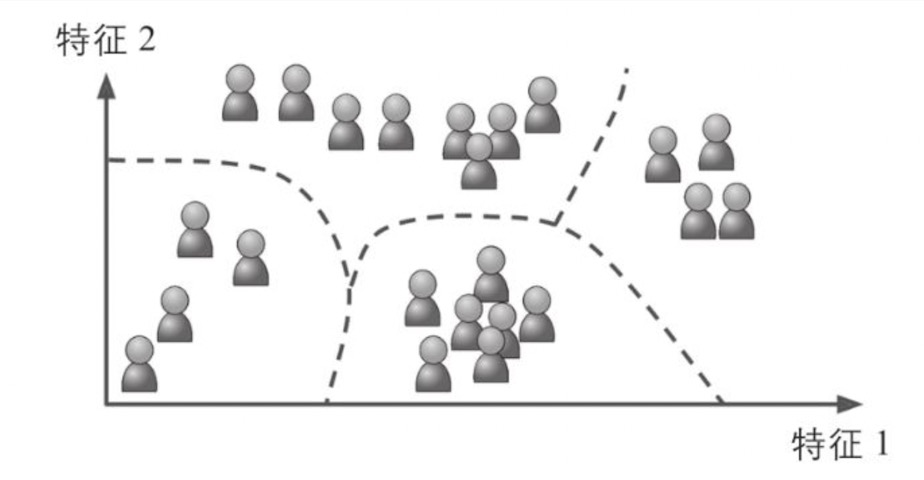
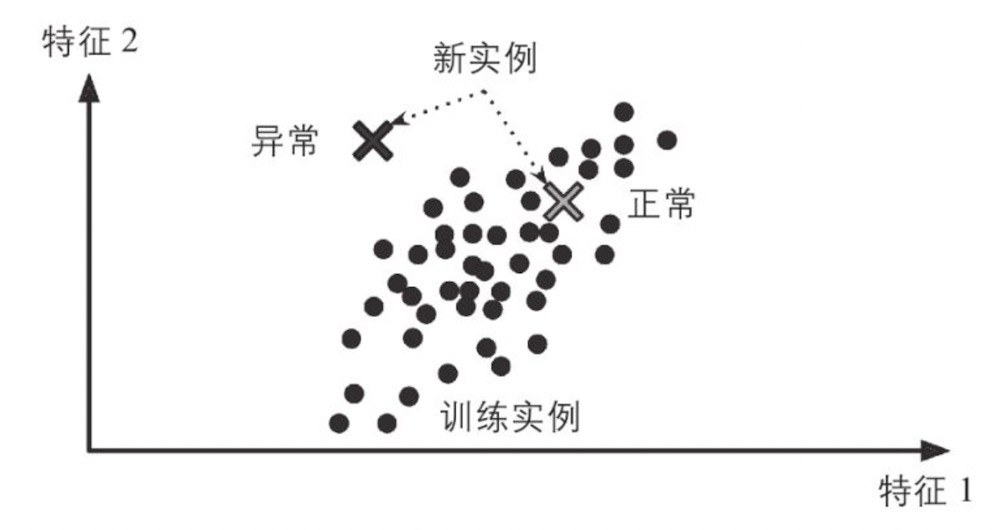

有时两者甚至可以结合使用: 例如，无监督学习可以用来寻找有用的信息，然后在监督框架下使用这些特征。

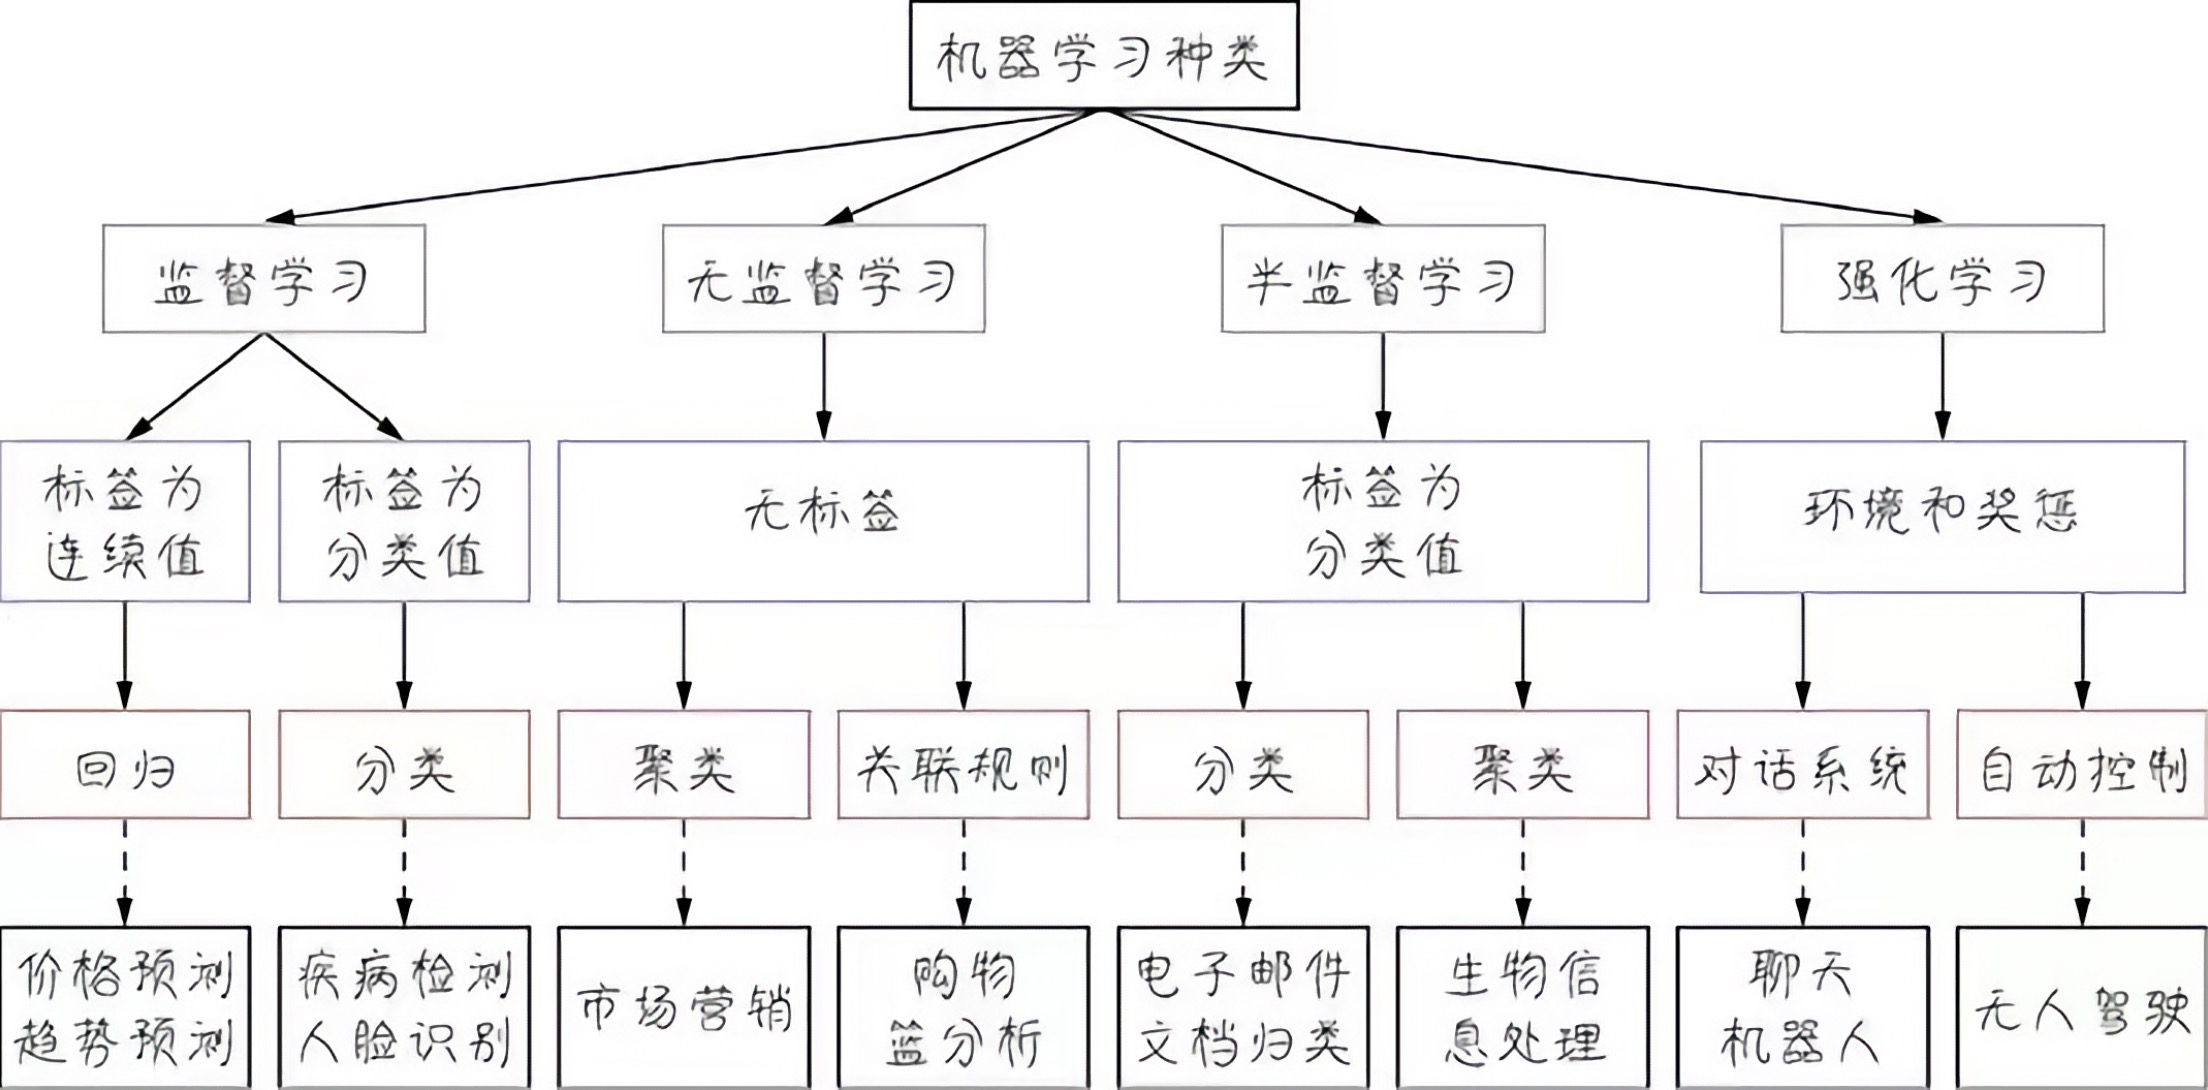
参考：《零基础学机器学习》

学习机器学习，最好的方法，就是不断努力实践，用机器学习解决实际问题。  

推荐两本实战口碑好书：

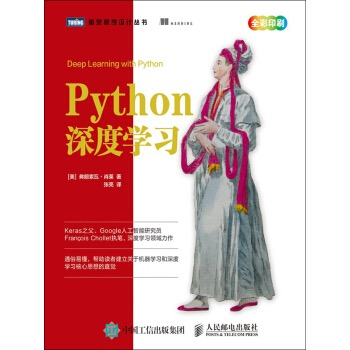 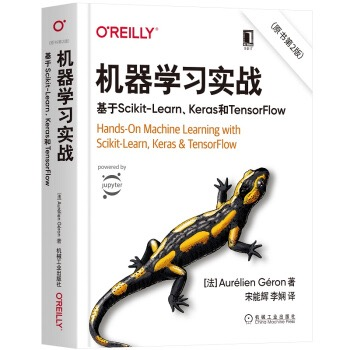